C:\Users\Jesse\AppData\Local\Temp\ipykernel_48424\1241048296.py:61: UserWarning: frames=<generator object simulate_motion at 0x0000020F6FD89DF0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  anim = animation.FuncAnimation(fig, update, frames=simulate_motion(positions, velocities, timestep, total_time), blit=True, interval=timestep*1000)
MovieWriter ffmpeg unavailable; using Pillow instead.


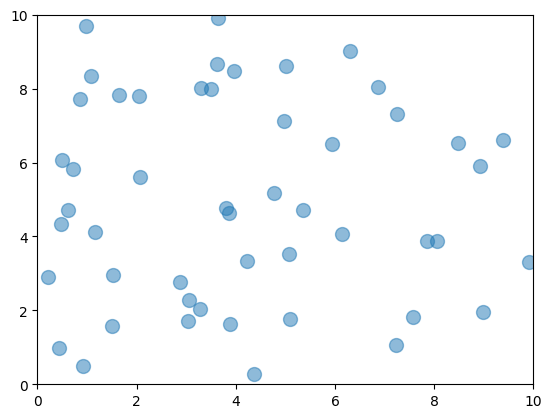

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set simulation parameters
num_particles = 50
box_size = 10.0
particle_size = 0.2
particle_mass = 0.1
timestep = 0.01
total_time = 10.0

# Initialize particle positions and velocities
positions = np.random.uniform(0.0, box_size, size=(num_particles, 2))
velocities = np.random.normal(0.0, 1.0, size=(num_particles, 2))

# Define function to simulate particle motion
def simulate_motion(positions, velocities, timestep, total_time):
    num_steps = int(total_time / timestep)
    for i in range(num_steps):
        # Update particle positions
        positions += velocities * timestep
        
        # Check for collisions with walls
        for j in range(2):
            # Reflect particle velocity if it hits a wall
            out_of_bounds = (positions[:,j] - particle_size < 0.0) | (positions[:,j] + particle_size > box_size)
            velocities[out_of_bounds,j] *= -1.0
            
        # Check for collisions between particles
        for j in range(num_particles):
            for k in range(j+1, num_particles):
                dist = np.linalg.norm(positions[j,:] - positions[k,:])
                if dist < 2*particle_size:
                    # Calculate new velocities using conservation of momentum and energy
                    v1 = velocities[j,:]
                    v2 = velocities[k,:]
                    m1 = particle_mass
                    m2 = particle_mass
                    v1_new = v1 - (2*m2 / (m1 + m2)) * np.dot(v1 - v2, positions[j,:] - positions[k,:]) / np.linalg.norm(positions[j,:] - positions[k,:])**2 * (positions[j,:] - positions[k,:])
                    v2_new = v2 - (2*m1 / (m1 + m2)) * np.dot(v2 - v1, positions[k,:] - positions[j,:]) / np.linalg.norm(positions[j,:] - positions[k,:])**2 * (positions[k,:] - positions[j,:])
                    velocities[j,:] = v1_new
                    velocities[k,:] = v2_new
        
        yield positions

# Create figure and axes for animation
fig, ax = plt.subplots()
ax.set_xlim(0.0, box_size)
ax.set_ylim(0.0, box_size)

# Create scatter plot of particles
scat = ax.scatter(positions[:,0], positions[:,1], s=particle_size*500, alpha=0.5)

# Define function to update scatter plot data
def update(frame):
    scat.set_offsets(frame)
    return scat,

# Create animation
anim = animation.FuncAnimation(fig, update, frames=simulate_motion(positions, velocities, timestep, total_time), blit=True, interval=timestep*1000)
anim.save("Particles1.gif")
# Display animation
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


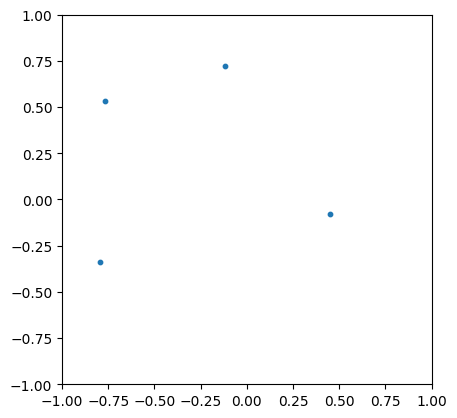

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def setup():
    num_particles = 50
    pos = np.random.uniform(-1, 1, size=(num_particles, 2))
    vel = np.random.normal(size=(num_particles, 2))
    return pos, vel

def animate(i, ax, pos, vel):
    pos += vel
    crossed_x = np.abs(pos[:, 0]) > 1
    crossed_y = np.abs(pos[:, 1]) > 1
    vel[crossed_x, 0] *= -1
    vel[crossed_y, 1] *= -1
    pos[crossed_x, 0] += np.sign(pos[crossed_x, 0]) * 0.1
    pos[crossed_y, 1] += np.sign(pos[crossed_y, 1]) * 0.1
    ax.clear()
    ax.scatter(pos[:, 0], pos[:, 1], s=10)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_aspect("equal")
    
fig, ax = plt.subplots()
pos, vel = setup()
anim = animation.FuncAnimation(fig, animate, fargs=(ax, pos, vel), frames=100, interval=50, blit=False)
anim.save("Particles2.gif")
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


2D heat equation solver
Done!


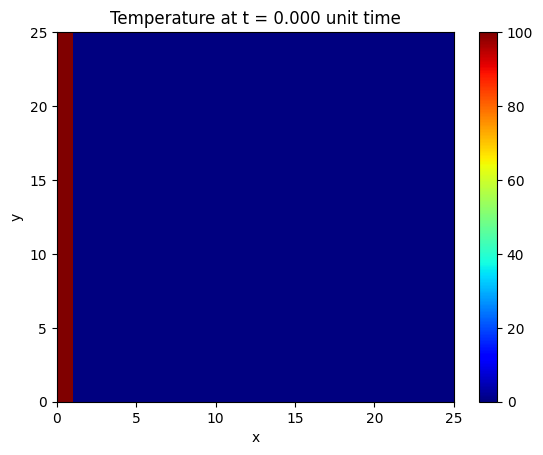

In [15]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

print("2D heat equation solver")

plate_length = 25
max_iter_time = 1000 #750

alpha = 20
delta_x = 1

delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0

# Boundary conditions
u_top = 0
u_left = 100
u_bottom = 0.0
u_right = 0.0

# Set the initial condition
u.fill(u_initial)

# Set the boundary conditions
u[:, (plate_length-1):, :] = u_top
u[:, :, :1] = u_left
u[:, :1, 1:] = u_bottom
u[:, :, (plate_length-1):] = u_right

def calculate(u):
# Vectorization step
    for k in range(0, max_iter_time-1, 1):
        u[k+1, 1:-1, 1:-1] = gamma * (u[k, 2:, 1:-1] + u[k, :-2, 1:-1] + u[k, 1:-1, 2:] + u[k, 1:-1, :-2] -4*u[k, 1:-1, 1:-1]) + u[k, 1:-1, 1:-1]
    return u

def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap='jet', vmin=0, vmax=100)
    plt.colorbar()

    return plt

# Do the calculation here
u = calculate(u)

def animate(k):
    plotheatmap(u[k], k)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("2Dheat_equation_solution1.gif")

print("Done!")



MovieWriter ffmpeg unavailable; using Pillow instead.


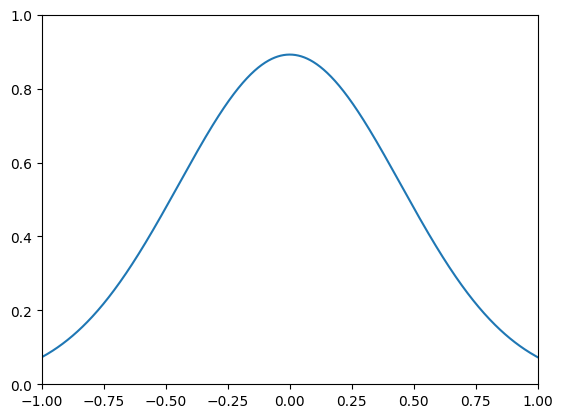

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define Gaussian function
def gaussian(x, t, D):
    if t == 0:
        return np.zeros_like(x)
    else:
        return 1.0 / np.sqrt(4*np.pi*D*t) * np.exp(-x**2 / (4*D*t))

# Set up figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(0, 1)

# Set up line object
x = np.linspace(-1, 1, 1000)
line, = ax.plot(x, gaussian(x, 0, 0.1))

# Set up time array
t = np.linspace(0, 1, 100)

# Define animate function
def animate(i, x, line):
    line.set_ydata(gaussian(x, t[i], 0.1))
    return line,

# Create animation object
anim = FuncAnimation(fig, animate, frames=len(t), fargs=(x, line), interval=20, blit=True)
anim.save("Gaussian.gif")
# Show animation
plt.show()
